# Loop over all the ~1 hr blocks of data and plot them as a strat plot to see if there are bad time periods

In [4]:
import numpy as np
import numpy.matlib
import pandas as pd
import os
import scipy.io as sio
import ieeg_funcs as ief
import dgFuncs as dg

from sklearn import preprocessing
import sys
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

In [9]:
sub='1096'
mat_fnames=list()
in_path=os.path.join('/Users/davidgroppe/ONGOING/EU_EEG/','FR_'+sub)
for fname in os.listdir(in_path):
    if fname.endswith('.mat'):
        mat_fnames.append(fname)

n_mat_files=len(mat_fnames)
print('# of mat files %d' % len(mat_fnames))

# of mat files 165


In [43]:
np.random.permutation(5)

array([4, 3, 1, 2, 0])

Loading file 109600102_0000.mat
Saving figure to 109600102_0000.png
Loading file 109600102_0001.mat
Saving figure to 109600102_0001.png
Loading file 109600102_0002.mat
Saving figure to 109600102_0002.png
Loading file 109600102_0003.mat
Saving figure to 109600102_0003.png
Loading file 109600102_0004.mat
Saving figure to 109600102_0004.png
Loading file 109600102_0005.mat
Saving figure to 109600102_0005.png
Loading file 109600102_0006.mat
Saving figure to 109600102_0006.png
Loading file 109600102_0007.mat
Saving figure to 109600102_0007.png
Loading file 109600102_0008.mat
Saving figure to 109600102_0008.png
Loading file 109600102_0009.mat
Saving figure to 109600102_0009.png
Loading file 109600102_0010.mat
Saving figure to 109600102_0010.png
Loading file 109600102_0011.mat
Saving figure to 109600102_0011.png
Loading file 109600102_0012.mat
Saving figure to 109600102_0012.png
Loading file 109600102_0013.mat
Saving figure to 109600102_0013.png
Loading file 109600102_0014.mat
Saving figure to

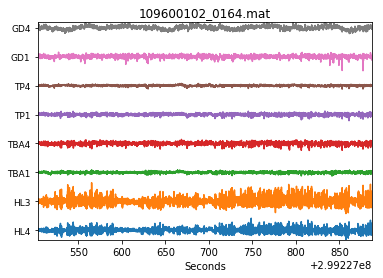

In [47]:
rand_file_ids=np.random.permutation(n_mat_files)
for a in range(n_mat_files):
#for a in range(1):
#for a in rand_file_ids[:10]: # plot a random subset
    print('Loading file %s' % mat_fnames[a])
    mat=sio.loadmat(os.path.join(in_path,mat_fnames[a]))
    
    chan_labels=list()
    for b in range(len(mat['use_chans'])):
        chan_labels.append(mat['use_chans'][b,:][0][0])
#     print('chan_labels {}'.format(chan_labels))
    
    plt.figure(1)
    plt.clf()
    ief.strat_plot(mat['ieeg256'],chan_labels,fig_id=1,show_chan_ids=None,h_offset=3000,
           srate=mat['Fs'],tpts_sec=mat['tpts_sec'].T,fontsize=9);
    plt.title(mat_fnames[a]);
    out_fname=mat_fnames[a].split('.')[0]+'.png'
    print('Saving figure to %s' % out_fname)
    plt.savefig(out_fname)

In [36]:
print(mat.keys())
# Extract channels
chan_labels=list()
for b in range(len(mat['use_chans'])):
    chan_labels.append(mat['use_chans'][b,:][0][0])
print(chan_labels)

dict_keys(['__header__', 'use_chans', 'szr_type', 'tpts_sec', 'just_ieeg_fname', 'Fs', 'is_szr', 'ieeg256', 'stop_ts', '__globals__', '__version__', 'start_ts'])
['HL4', 'HL3', 'TBA1', 'TBA4', 'TP1', 'TP4', 'GD1', 'GD4']


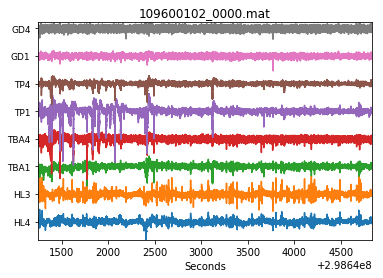

In [37]:
plt.figure(1)
plt.clf()
ief.strat_plot(mat['ieeg256'],chan_labels,fig_id=1,show_chan_ids=None,h_offset=2800,
           srate=mat['Fs'],tpts_sec=mat['tpts_sec'].T,fontsize=9);
plt.title(mat_fnames[a]);
#strat_plot(dat,chan_labels,fig_id=1,show_chan_ids=None,h_offset=2,srate=1,
#tpts_sec=None,fontsize=9)